In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from perceptron import Perceptron
import perceptron_training
import pdr

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# select setosa and versicolor 
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length 
X = df.iloc[0:100, [0, 2]].values


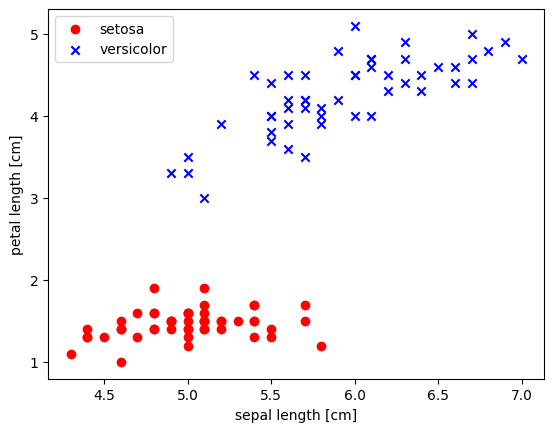

In [42]:
# plot the data 
plt.scatter(X[:50, 0], X[:50, 1], 
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], 
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

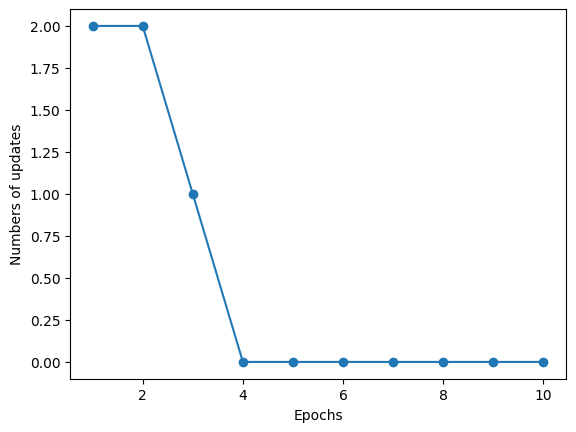

In [43]:
ppn = Perceptron(eta = 0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), 
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Numbers of updates')
plt.show()

/tmp/ipykernel_15608/2711366099.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


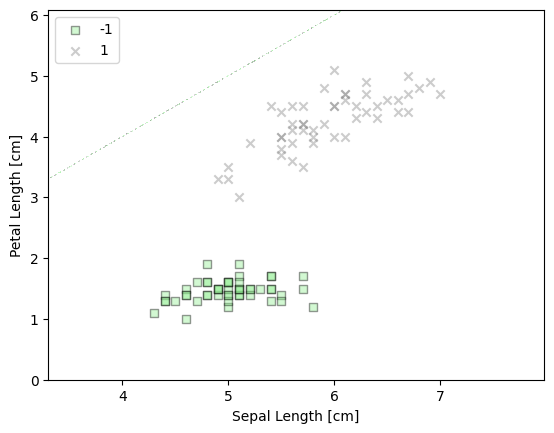

In [39]:
# pdr.plot_decision_regions(X, y, classifier=ppn)
resolution = 0.02
# setup marker generator and color map 
markers = ('s', 'x', 'o', '^', 'v')
# markers = enumerate(markers)
colors = ('lightgreen', 'gray', 'cyan', 'red', 'blue')
colors = np.array(colors)
cmap = ListedColormap(colors[:len(np.unique(y))])

# plot the decision surface 
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                        np.arange(x2_min, x2_max, resolution))
z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
z = z.reshape(xx1.shape)
plt.contourf(xx1, xx1, z, alpha=0.3 ,cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# plot class samples 
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y = X[y == cl, 1], 
                alpha = 0.4, 
                c = colors[idx], 
                marker = markers[idx], 
                label = cl, 
                edgecolor = 'black')


plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.show()